### This notebook divided into 3 parts:
> EDA

> Mainpulation

> Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import warnings

In [2]:
warnings.filterwarnings('ignore')

## EDA

In [3]:
df_train = pd.read_csv("data/train.csv",index_col="PassengerId")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("data/test.csv", index_col="PassengerId")
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
Y_test = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")
Y_test.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Mainpulation

In [9]:
df_train[["Embarked","Name"]].groupby(by=["Embarked"],as_index=True).count().sort_values("Name",ascending=False)

,Name
Embarked,
S,644
C,168
Q,77


In [10]:
# so we notes that Most repeated Embarked is S, so that we can replace null value in Embarked column with it.
most_repeated = "S"
df_train.Embarked.replace(np.nan, most_repeated, inplace=True)
df_test.Embarked.replace(np.nan, most_repeated, inplace=True)
print("the number of null value in Embarked Column =",df_train.Embarked.isnull().sum())

the number of null value in Embarked Column = 0


In [11]:
# transform Embarked Column to numeric.
Embarked_transform_dict = {"S":1, "C":2, "Q":3}
for value in Embarked_transform_dict:
    df_train.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
    df_test.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
df_train.head(5)
# we now finish cleaning and transform column Emvarked to numeric.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [12]:
print("the number of null value in Cabin Column =", df_train.Cabin.isnull().sum())
# notes that null values is 687 from 891 (77%) of Cabin column is null, so i will droped it from data.

the number of null value in Cabin Column = 687


In [13]:
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)

df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,1


In [14]:
# Enter to Fare column
# calculate the range of value in Fare column.
print("Range of Fare column values = ", df_train.Fare.max() - df_train.Fare.min())
# min value is 0.0 and max value = 512.3292
# i will divied this range to 10 sections.
df_test.Fare.replace(np.nan, df_test.Fare.mean(), inplace=True)
print("Range of Fare column values = ", df_test.Fare.max() - df_test.Fare.min())

Range of Fare column values =  512.3292
Range of Fare column values =  512.3292


In [15]:
df_train.Fare = df_train.Fare.astype("int64")
df_test.Fare = df_test.Fare.astype("int64")

# df_train.info()
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,3
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9,3
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12,1
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108,2
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7,1


In [16]:
bins_i = [-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
labels_i = [1,2,3,4,5,6,7,8,9,10,11]

df_train['stage'] = 0
df_train['stage'] = pd.cut(df_train.Fare, bins=bins_i, labels=labels_i)

df_test['stage'] = 0
df_test['stage'] = pd.cut(df_test.Fare, bins=bins_i, labels=labels_i)

df_train.stage.unique()

[1, 2, 6, 3, 5, 11, 4]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 11]

In [17]:
df_train.Fare = df_train.stage.astype("int64")
df_test.Fare = df_test.stage.astype("int64")
df_train.drop("stage", axis=1, inplace=True)
df_test.drop("stage", axis=1, inplace=True)

In [18]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,2,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,1,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,1,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,1,1


In [19]:
df_test.Fare.unique()

array([ 1,  2,  6,  5,  4,  3, 11], dtype=int64)

In [20]:
df_train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [21]:
# i drop this column, because this is column is outlayer of data not need.
df_train.drop("Ticket", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

In [22]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,1,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,1,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,1,1


In [23]:
# Sex column.
Sex_dict = {"male":1, "female":2}
for key, value in Sex_dict.items():
    df_train.Sex.replace(key, value, inplace=True)
    df_test.Sex.replace(key, value, inplace=True)
df_train.Sex = df_train.Sex.astype("int64")
df_test.Sex = df_test.Sex.astype("int64")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,2,2
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,2,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,1


In [24]:
df_train["Title"] = 0

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [df_train, df_test]
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,1,1,1
2,1,1,2,38.0,1,0,2,2,3
3,1,3,2,26.0,0,0,1,1,2
4,1,1,2,35.0,1,0,2,1,3
5,0,3,1,35.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,1,1,5
888,1,1,2,19.0,0,0,1,1,2
889,0,3,2,NaN,1,2,1,1,2


In [25]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [26]:
df_Age_train = df_train.loc[pd.notna(df_train.Age)]
df_Age_train.Age = df_Age_train.Age.astype("float64")
df_Age_train.Age = (df_Age_train.Age - df_Age_train.Age.mean()) / df_Age_train.Age.std()
df_Age_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,1,-0.530005,1,0,1,1,1
2,1,1,2,0.571430,1,0,2,2,3
3,1,3,2,-0.254646,0,0,1,1,2
4,1,1,2,0.364911,1,0,2,1,3
5,0,3,1,0.364911,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
886,0,3,2,0.640270,0,5,1,3,3
887,0,2,1,-0.185807,0,0,1,1,5
888,1,1,2,-0.736524,0,0,1,1,2


In [27]:
df_Age_train.Survived.corr(df_Age_train.Age)
# so i will drop Age column, because it is correlation between Age and Survived is very small.

-0.07722109457217764

In [28]:
df_train.drop("Age", axis=1, inplace=True)
df_test.drop("Age", axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,0,3,1,1,0,1,1,1
2,1,1,2,1,0,2,2,3
3,1,3,2,0,0,1,1,2
4,1,1,2,1,0,2,1,3
5,0,3,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...
887,0,2,1,0,0,1,1,5
888,1,1,2,0,0,1,1,2
889,0,3,2,1,2,1,1,2


In [29]:
df_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,
892,3,1,0,0,1,3,1
893,3,2,1,0,1,1,3
894,2,1,0,0,1,3,1
895,3,1,0,0,1,1,1
896,3,2,1,1,1,1,3
...,...,...,...,...,...,...,...
1305,3,1,0,0,1,1,1
1306,1,2,0,0,3,2,5
1307,3,1,0,0,1,1,1


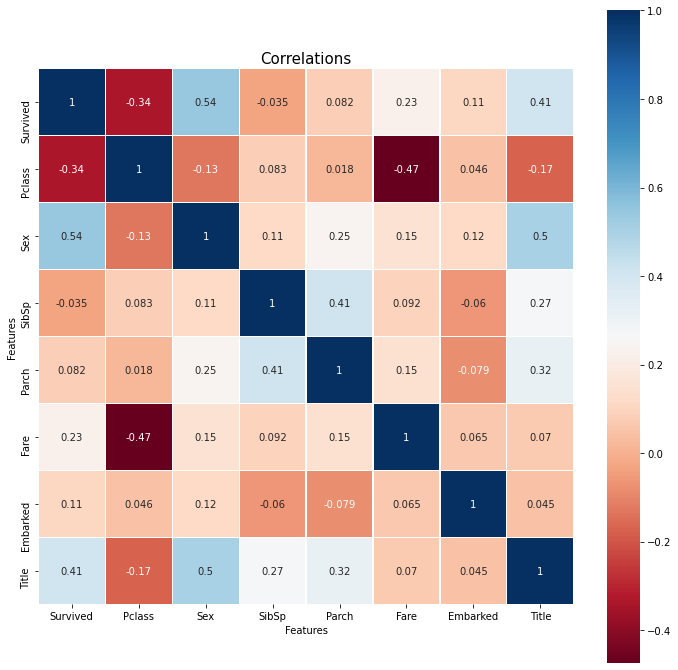

In [30]:
colormap=plt.cm.RdBu
figure = plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.title("Correlations",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [31]:
X_train = df_train[["Pclass","Sex", "Title", "Fare"]]
Y_train = df_train["Survived"]
len(Y_train)

891

In [32]:
X_test = df_test[["Pclass","Sex", "Title", "Fare"]]
len(X_test)

418

In [33]:
len(Y_test)

418

## Predictions

### SGDClassifier (70.5%)

In [34]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, Y_train)
Y_pred_SGD = sgd_clf.predict(X_test)
sgd_clf.score(X_train, Y_train)

0.7508417508417509

In [35]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_SGD))], "Survived":Y_pred_SGD}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("prediction/SGD.csv")

### Random Forest (76.7%)

In [36]:
random_forest = RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.1, n_jobs=-1)
random_forest.fit(X_train, Y_train)
Y_pred_Random = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.8069584736251403

In [37]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_Random))], "Survived":Y_pred_Random}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("prediction/Random.csv")

### Logistic Regression (76%)

In [38]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
Y_pred_Logistic = logistic_regression.predict(X_test)
logistic_regression.score(X_train, Y_train)

0.7789001122334456

In [39]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_Logistic))], "Survived":Y_pred_Logistic}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("prediction/Logistic.csv")

### Decision Tree (76%)

In [40]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, Y_train)
Y_pred_Tree= tree.predict(X_test)
print("the score of prediction = ",round(tree.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  80.7 %


In [41]:
scores= cross_val_score(tree, X_train, Y_train, scoring="accuracy", cv=200)
scores.mean()

0.778

In [42]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_Tree))], "Survived":Y_pred_Tree}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("prediction/Tree.csv")

### SVM (76%)

In [43]:

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, Y_train)
Y_predict_svm = clf.predict(X_test)
accuracy = clf.score(X_train, Y_train)
print(accuracy)

0.7867564534231201


In [44]:
output_csv = {"PassengerId":[*range(892,892+len(Y_predict_svm))], "Survived":Y_predict_svm}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("prediction/svm.csv")

### KNeighbors (79%)

In [45]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
Y_pred_KNN= knn.predict(X_test)
print("the score of prediction = ",round(knn.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  79.91 %


In [46]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_KNN))], "Survived":Y_pred_KNN}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("prediction/KNN.csv")

In [47]:
# !kaggle competitions download -c titanic

In [48]:
# !kaggle competitions submit -c titanic -f data/KNN.csv -m "KNN++"

In [49]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 2), random_state=1)
clf.fit(X_train, Y_train)
Y_pred_clf= clf.predict(X_test)
print("the score of prediction = ",round(clf.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  79.01 %


In [50]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_clf))], "Survived":Y_pred_clf}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("prediction/clf.csv")

In [51]:
# !kaggle competitions submit -c titanic -f prediction/clf.csv -m "clf++"